<a href="https://colab.research.google.com/github/Brendelima/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: necesito solicitarte que me  armes un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Tecnología', 'Formación Ética y Ciudadana']

# Función para generar nombres y apellidos aleatorios (simplificado)
def generar_nombre():
  nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Luis', 'Sofia', 'Carlos', 'Laura', 'Diego', 'Valentina']
  apellidos = ['Gomez', 'Rodriguez', 'Perez', 'Lopez', 'Garcia', 'Martinez', 'Sanchez', 'Fernandez', 'Gonzalez', 'Diaz']
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear DataFrame
data = []
for _ in range(100):
    nombre_completo = generar_nombre()
    dni = random.randint(10000000, 99999999)  # DNI argentino (ejemplo)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)
    data.append([nombre_completo, dni, materia, nota1, nota2, nota3, faltas])

df = pd.DataFrame(data, columns=['Nombre Completo', 'DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Mostrar las primeras filas del DataFrame
print(df.head())

   Nombre Completo       DNI Materia Escolar  Nota 1er Trimestre  \
0      Carlos Diaz  69955853           Artes                  10   
1       Juan Perez  67685501       Geografía                   2   
2   Diego Gonzalez  52087166        Historia                  10   
3    Luis Martinez  93722881          Inglés                   1   
4  Pedro Rodriguez  11461342           Artes                  10   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                  10                   2               14  
1                   5                   1                1  
2                   5                   9               15  
3                   1                   8                9  
4                  10                   2               16  


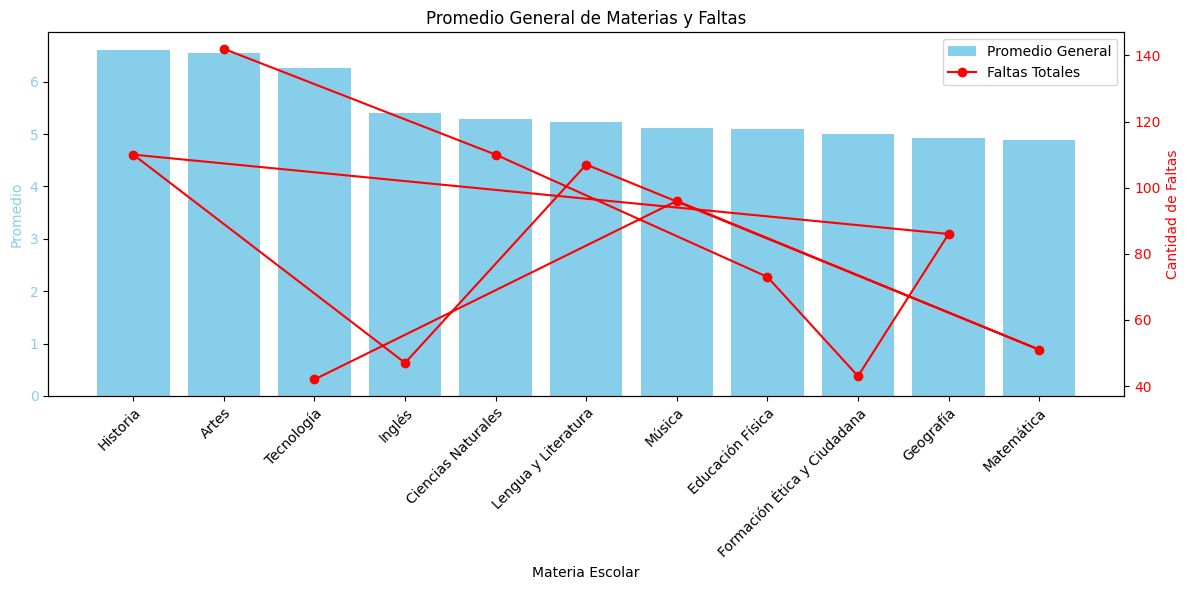

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
promedios_materias = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para los promedios
ax1.bar(promedios_materias.index, promedios_materias.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas')

# Segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajustar la rotación de las etiquetas del eje x para mejor legibilidad
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Agregar leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)